<a href="https://colab.research.google.com/github/kunalNbadgujar/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Netflix Movies and TV Shows Clustering**    

##### **Project Type**    - Unsupervised
##### **Contribution**    - Team
##### **Team Member 1 -**  Kunal Badgujar
##### **Team Member 2 -** Aarti Gade
##### **Team Member 3 -** Vivek Tanagawade


# **Project Summary -**

The goal of this project is to analyze the Netflix catalog of movies and TV shows, which was sourced from the third-party search engine Flixable, and group them into relevant clusters. This will aid in enhancing the user experience and prevent subscriber churn for the world's largest online streaming service provider, Netflix, which currently boasts over 220 million subscribers as of 2022-Q2. The dataset, which includes movies and TV shows as of 2019, will be analyzed to uncover new insights and trends in the rapidly growing world of streaming entertainment.

There were approximately 7787 records and 11 attributes in the dataset.

I started by working on the missing values in the dataset and conducting exploratory data analysis (EDA).

Using the following attributes to create a cluster: cast, country, genre, director, rating, and description The TFIDF vectorizer was used to tokenize, preprocess, and vectorize the values in these attributes.

The problem of dimensionality was dealt with through the use of Principal Component Analysis (PCA).

Using a variety of methods, including the elbow method, silhouette score, dendrogram, and others, we constructed two distinct types of clusters with the K-Means Clustering and Agglomerative Hierarchical clustering algorithms, respectively, and determined the optimal number of clusters.

The similarity matrix generated by applying cosine similarity was used to construct a content-based recommender system. The user will receive ten recommendations from this recommender system based on the type of show they watched.

# **GitHub Link -**

https://github.com/kunalNbadgujar/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This Dataset consists of Tv shows and Movies available on netflix as of 2019.
the dataset is collected from Flixable. In 2018, they released an intereting report which shows that the number of TV shows on netflix has nearly tripled since 2010. number of movies has decreased by more than 2000 titles since 2010, while its number of tv shows has nearly tripled. it will be intersting to explore what all other insights can be obtained from the same dataset.

Integrating this Dataset with other external dataset such as IMDB rating, rotten tomatos can also provide many intersting findings.

In this project, required to do





*   EDA


*   Understaing what Kind of content is available in differnt contries.
*   If netflix has been increasingly focusing on TV rather than movies in recent years.

*    Clustering similar content by matching text-based features










# ***Let's Begin !***

In [1]:
# Mounting Drive

from google.colab import drive
drive.mount('/content/drive')





Mounted at /content/drive


In [3]:
# Firstly import  libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# library used for textual data prerocessing
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# library used for building recommandation system
from sklearn.metrics.pairwise import cosine_similarity


# library used for Clusters impelementation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')





[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


.

.

### **Dataset Loading**

In [4]:
# import csv file from Drive

df=  pd.read_csv('/content/drive/MyDrive/Project Netflix movies and tv shows clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

.

.

### **Dataset First View**

In [5]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [6]:
# lets see the shape of our dataset

df.shape

(7787, 12)

In [ ]:
# our Dataset has 7787 Rows and 12 Columns 

.

.

### **Dataset Information**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


we see that our data set cantain some null values in some columns 

.

.

### **Checking for the null values, And deal with them** 

In [8]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [ ]:
# we see that columns ( direcor , cast , country , date_addded ) cantains some null values, So we have to deal with them,

In [9]:
df.fillna('unknown', inplace=True)

In [10]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# Now, our dataset have no null values 

.

.

### **lets check for the duplicate values** 

In [11]:
df.duplicated().sum()

0

our dataset have no duplicate values

.

.

.

## **Understanding Your Variables**

In [12]:
# lets check the statical description 

df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [13]:
df.describe(include='object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787,7787
unique,7787,2,7787,4050,6832,682,1566,15,216,492,7769
top,s1,Movie,3%,unknown,unknown,United States,"January 1, 2020",TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,2389,718,2555,118,2863,1608,334,3


In [14]:
df['date_added'] = pd.to_datetime(df['date_added'],errors='coerce')
     

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7787 non-null   object        
 1   type          7787 non-null   object        
 2   title         7787 non-null   object        
 3   director      7787 non-null   object        
 4   cast          7787 non-null   object        
 5   country       7787 non-null   object        
 6   date_added    7777 non-null   datetime64[ns]
 7   release_year  7787 non-null   int64         
 8   rating        7787 non-null   object        
 9   duration      7787 non-null   object        
 10  listed_in     7787 non-null   object        
 11  description   7787 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 730.2+ KB


In [15]:
df.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...


.

.

## **Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

.

**Chart - 1 Movies and TV shows**

Text(0.5, 1.0, 'Count of Values')

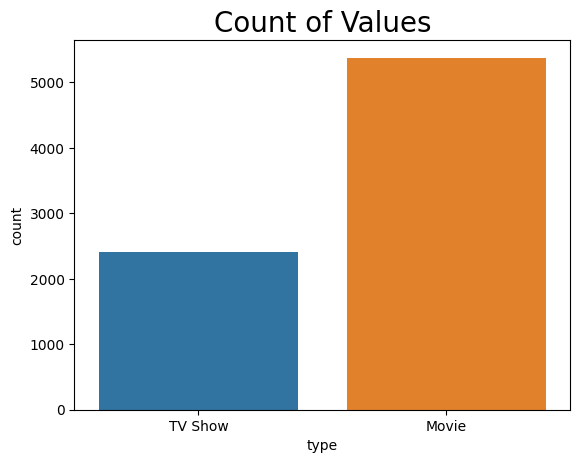

In [16]:
graph = sns.countplot(x = 'type', data = df)
graph.set_title('Count of Values', size=20)

In this count plot there are more movies 5372(aprox 70%) than TV shows 2398 (aprox30) in the dataset.

.

.

**Chart - 2 country**

Text(0.5, 1.0, 'Top 10 countries with the highest number of movies / TV shows')

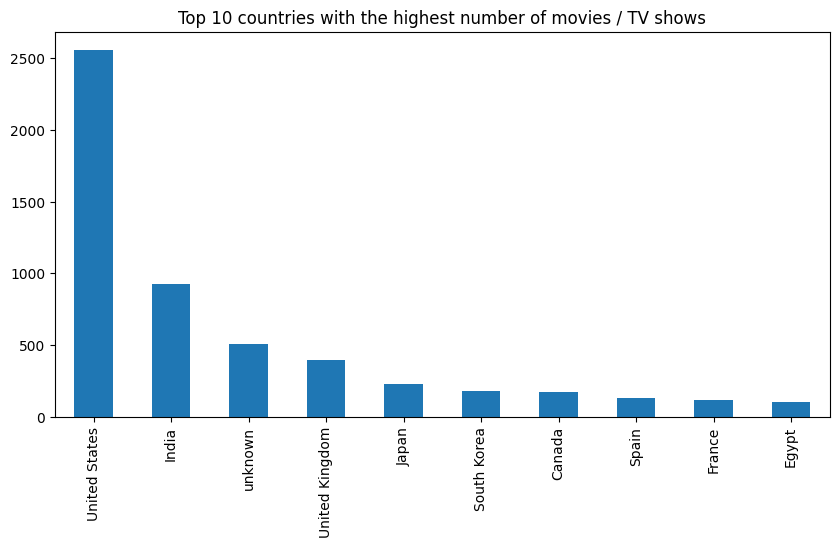

In [17]:
plt.figure(figsize=(10,5))
df.country.value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 countries with the highest number of movies / TV shows')

The highest number of movies / TV shows were based out of the US, followed by India and UK.

.

.

**Chart - 3 Rating**

Text(0.5, 1.0, ' Age ratings for shows in the dataset')

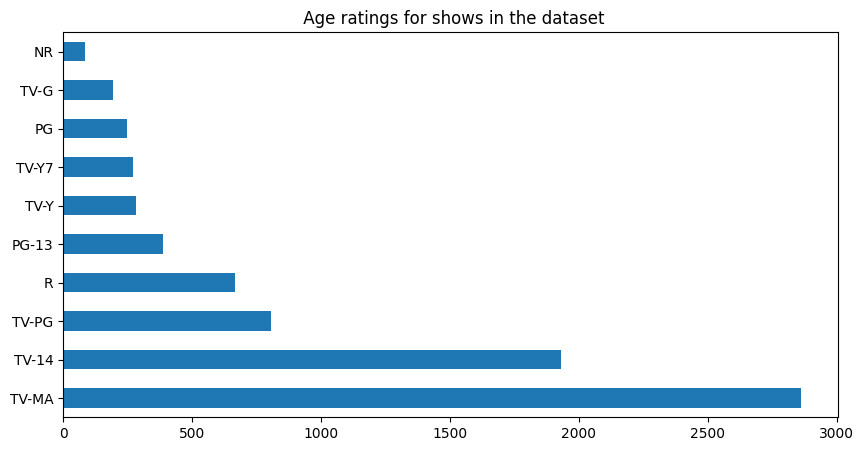

In [18]:
plt.figure(figsize=(10,5))
df.rating.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Age ratings for shows in the dataset')

most of the movie and tv shows have rating of TV-MA (Mature Audiance) then followed by TV-14 (younger audiance).

.

.